<a href="https://colab.research.google.com/github/dooinn/bellabeat-pyton/blob/main/bellabeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Wellness products User Habits


## Introduction

This data analysis project is a part of Google Analytics Certificate Project. The project is designed to give business insights to the marketing team in the Bellbeat, the fictional company which is a high-tech manufactuere of health-focused products for women.

The main goal of this project is to investigate the customer's habit who are using the wellness products.

Bellabeat already have their own smart wellness and health products. The prominent product is Wellness-habit-tracker mobile app which allows users to track their stres level, sleep hours, caolories etc.

However, the company is attempting to expand users of their smart products, and the company belives that they are able to obtain some insights to understand the market trend of the smart devices users by investigating the data from external sources.

**Data Sources**:
The provided dataset is the part of real world data that contains personal fitness tracker from thirty fitbit users (Available at: https://www.kaggle.com/arashnic/fitbit)




### Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.


### Project Goals
*   What is the distribution of daily calories burnt?
*   What is the distribution of daily sleep length?
*   Are there correlations between weights and activity intensities/calories and activity, steps and intensities/calories and sleep length?




## Import Python modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('whitegrid');

##Loading the data

In [ ]:
# Activity
dailyActivity = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/dailyActivity_merged.csv")

# Calories
dailyCalories = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/dailyCalories_merged.csv")
hourlyCalories = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/hourlyCalories_merged.csv")
minuteCaloriesNarrow = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/minuteCaloriesNarrow_merged.csv")
minuteCaloriesWide = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/minuteCaloriesWide_merged.csv")

# Intensities
dailyIntensities = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/dailyIntensities_merged.csv")
hourlyIntensities = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/hourlyIntensities_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/minuteIntensitiesNarrow_merged.csv")
minuteIntensitiesWide = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/minuteIntensitiesWide_merged.csv")

# Steps
dailySteps = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/dailySteps_merged.csv")
hourlySteps = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/hourlySteps_merged.csv")
minuteStepsNarrow = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/minuteStepsNarrow_merged.csv")
minuteStepsWide = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/minuteStepsWide_merged.csv")

# Sleep
sleepDay = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/sleepDay_merged.csv")
minuteSleep = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/minuteSleep_merged.csv")

# HeartRate
heartrateSeconds = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/heartrate_seconds_merged.csv")

# Weight
weightLogInfo = pd.read_csv("/content/drive/MyDrive/Data analysis/Bellabeat/weightLogInfo_merged.csv")


## Data Exploration

### Activity
Let's first have a look dailyActivity data.
The rows are logged with the several activities distance and length with the intensitiy of the acitvities.

In [ ]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Other data are more specifically (daily, hourly, minitues) present the data that describes in the dailyActivity data. Let's play with data to see by throwing some questions if there is some interesiting information to more depply dig in. 

### Calories
What is the average daily calories burnt by the users?

In [ ]:
dailyCalories.groupby('Id').mean('calories').mean()
# the mean of customers' daily calories are 2282.44366 Calories per day

Calories    2282.44366
dtype: float64

How different daily calories burnt reveal indeividually?

In [ ]:
mean_daily_calories=dailyCalories.groupby('Id').mean('Calories')
mean_daily_calories.head()

,Calories
Id,
1503960366,1816.419355
1624580081,1483.354839
1644430081,2811.300000
1844505072,1573.483871
1927972279,2172.806452


See the distribution of the daily calories of the individual users.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


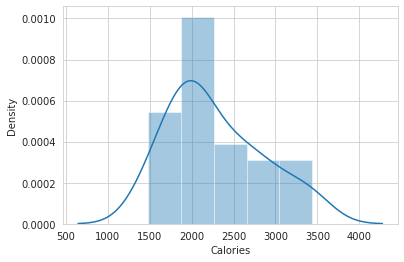

In [ ]:
sns.distplot(mean_daily_calories['Calories'])

What about the aveary calory burnt by day-of-week?

In [ ]:
dailyCalories['ActivityDay'] = pd.to_datetime(dailyCalories['ActivityDay'])

In [ ]:
dailyCalories['day_of_week'] = dailyCalories['ActivityDay'].dt.strftime("%A")
dailyCalories1=dailyCalories.drop(columns=['day_of_week'])

In [ ]:
dailyCalories.drop(columns=['Id']).groupby('day_of_week').mean('Calories')

,Calories
day_of_week,
Friday,2331.785714
Monday,2324.208333
Saturday,2354.967742
Sunday,2263.000000
Thursday,2199.571429
Tuesday,2356.013158
Wednesday,2302.620000


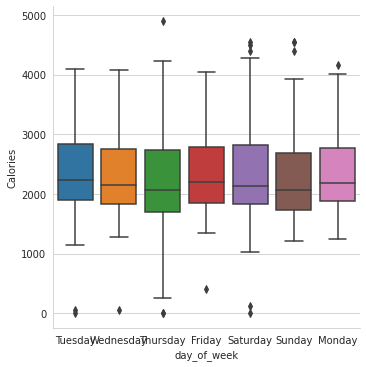

In [ ]:
sns.catplot(x="day_of_week", y="Calories", data=dailyCalories, kind='box')

The average calories by day of week does not reveal the significant differences between days...

In [ ]:
hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [ ]:
hourlyCalories['ActivityHour'] = pd.to_datetime(hourlyCalories['ActivityHour'])

In [ ]:
hourlyCalories['hour'] = hourlyCalories['ActivityHour'].dt.hour

In [ ]:
hourlyCalories.head()

,Id,ActivityHour,Calories,hour
0,1503960366,2016-04-12 00:00:00,81,0
1,1503960366,2016-04-12 01:00:00,61,1
2,1503960366,2016-04-12 02:00:00,59,2
3,1503960366,2016-04-12 03:00:00,47,3
4,1503960366,2016-04-12 04:00:00,48,4


In [ ]:
hourlyCalories.groupby('hour').mean('Calories').head()

,Id,Calories
hour,,
0,4.846554e+09,71.805139
1,4.844238e+09,70.165059
2,4.844238e+09,69.186495
3,4.844238e+09,67.538049
4,4.844801e+09,68.261803


Around the 12-14 PM and 17-19 PM is the most active time that burnt calories the most in a day.

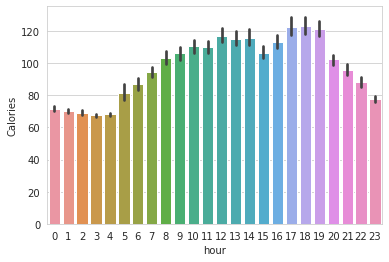

In [ ]:
sns.barplot(x="hour", y="Calories", data=hourlyCalories);

### Sleep

Next, let's see the sleeping hours by customers.
How long do they sleep in a day?



In [ ]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
sleepDay.groupby("Id").mean("TotalMinutesAsleep").describe()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,24.000000,24.000000,24.000000
mean,1.096897,377.647518,420.095938
std,0.152415,136.764040,173.901710
min,1.000000,61.000000,69.000000
25%,1.000000,336.281250,377.062500
50%,1.019231,419.071429,447.882143
75%,1.129464,449.281250,485.317708
max,1.600000,652.000000,961.000000


In [ ]:
sleepDay.groupby("Id").mean("TotalMinutesAsleep").median()

TotalSleepRecords       1.019231
TotalMinutesAsleep    419.071429
TotalTimeInBed        447.882143
dtype: float64

In [ ]:
mean_sleep=sleepDay.groupby("Id").mean("TotalMinutesAsleep")
mean_sleep1=mean_sleep[(mean_sleep['TotalMinutesAsleep']) > 420]
mean_sleep1.count()/sleepDay.groupby("Id").mean("TotalMinutesAsleep").count()

TotalSleepRecords     0.5
TotalMinutesAsleep    0.5
TotalTimeInBed        0.5
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


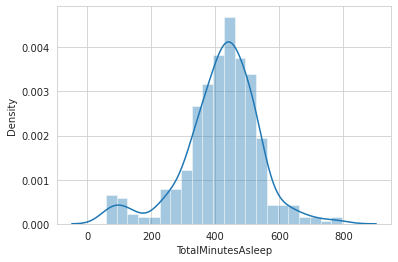

In [ ]:
sns.distplot(sleepDay['TotalMinutesAsleep'])

The average sleep hours per customer is 377 minutes, 6hours 17 mins. 
The median value is 419 minutes. However, 50% of total customeres sleep more than 420 minutes (the recommended minimum hours of sleep for the age group above 18 years old).

Next, what is the dynamic of the sleeping hours by days?

In [ ]:
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])

In [ ]:
sleepDay['day_of_week'] = sleepDay['SleepDay'].dt.strftime("%A")
sleepDay.sort_values('day_of_week', ascending=False).head()
sleepDay1=sleepDay.drop(columns=['Id',"SleepDay", "TotalSleepRecords", "TotalTimeInBed" ])

In [ ]:
sleepDay1.groupby('day_of_week').describe()

TotalMinutesAsleep                          ...                     
                         count        mean         std  ...    50%    75%    max
day_of_week                                             ...                     
Friday                    57.0  405.421053  113.053708  ...  405.0  465.0  658.0
Monday                    47.0  418.829787  118.732311  ...  433.0  492.5  796.0
Saturday                  58.0  420.810345  154.495268  ...  434.0  510.0  775.0
Sunday                    55.0  452.745455  145.050721  ...  481.0  550.5  700.0
Thursday                  65.0  402.369231  102.393782  ...  424.0  468.0  545.0
Tuesday                   65.0  404.538462   96.089326  ...  417.0  465.0  750.0
Wednesday                 66.0  434.681818   89.990454  ...  444.5  477.0  658.0

[7 rows x 8 columns]

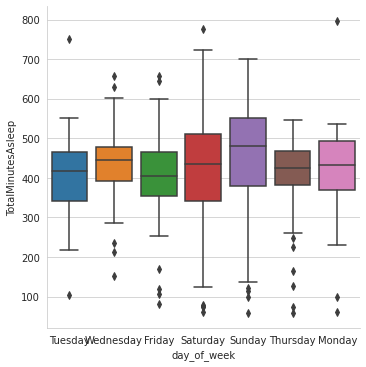

In [ ]:
sns.catplot(x="day_of_week", y="TotalMinutesAsleep", data=sleepDay, kind='box')

the average of hours of sleep during weekends reveal the slightly higher than during the weekdays as expected. Interestingly, the range of hours of sleep during weekends is more wider than during the weekdays.

In [ ]:
dailyIntensities['ActivityDay'] = pd.to_datetime(dailyIntensities['ActivityDay'])
dailyIntensities['day_of_week'] = dailyIntensities['ActivityDay'].dt.strftime("%A")
dailyIntensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14,Friday
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71,Saturday


In [ ]:
dailyIntensities.groupby('Id').mean().describe()

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,999.151475,191.521291,13.260240,20.308769,0.001625,3.317450,0.557039,1.449551
std,227.678526,75.689747,12.108217,23.803214,0.003020,1.375683,0.537638,1.866091
min,662.322581,38.580645,0.258065,0.096774,0.000000,0.507097,0.011290,0.006129
25%,766.419355,143.838710,4.034483,3.580645,0.000000,2.606774,0.128276,0.142258
50%,1077.550000,206.193548,12.322581,10.387097,0.000000,3.504516,0.502258,0.730000
75%,1206.612903,245.806452,19.354839,23.419355,0.000769,4.143548,0.773226,2.214210
max,1317.419355,327.900000,61.266667,87.333333,0.011000,6.188710,2.751000,8.514839


In [ ]:
dailyIntensities.groupby('day_of_week').mean()

,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
day_of_week,,,,,,,,,
Friday,4.880997e+09,1000.309524,204.198413,12.111111,20.055556,0.001825,3.489127,0.483810,1.312937
Monday,4.859930e+09,1027.941667,192.058333,14.000000,23.108333,0.002583,3.363083,0.585833,1.537333
Saturday,4.908075e+09,964.282258,207.145161,15.201613,21.919355,0.001048,3.617177,0.677339,1.514597
Sunday,4.847640e+09,990.256198,173.975207,14.528926,19.983471,0.000661,2.892314,0.618017,1.488926
Thursday,4.837277e+09,961.993197,185.421769,11.959184,19.408163,0.002313,3.283129,0.505170,1.390476
Tuesday,4.851063e+09,1007.361842,197.342105,14.335526,22.953947,0.001447,3.471053,0.593026,1.613289
Wednesday,4.815191e+09,989.480000,189.853333,13.100000,20.780000,0.001333,3.256333,0.527067,1.633467


In [ ]:
mean_hourlySteps=hourlySteps.groupby('Id').mean('StepTotal')
mean_hourlySteps.mean()
# the mean of customers hourly calories are 315.95 steps per hour

StepTotal    315.954638
dtype: float64

In [ ]:
mean_hourlySteps.describe()

,StepTotal
count,33.000000
mean,315.954638
std,151.513628
min,38.586957
25%,233.788043
50%,307.806497
75%,413.857488
max,674.317007


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


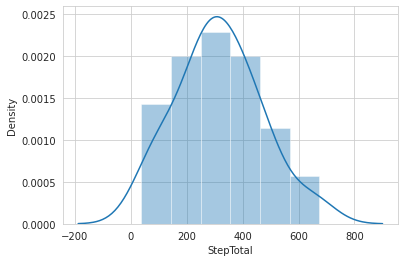

In [ ]:
sns.distplot(mean_hourlySteps['StepTotal'])

## Analysis

So far we have examined the multiple datasets, but we don't see any meaninful insights for marketing strategy. Thus, here I attempt to suggest some guideline/hypothesis to get some meningful results from this analysis.


Wellness proucts are the main products of Bellabeat. 

And the main target group is female (if largely young females aged between 18-30?) who are largely sensitive to their weights.

Therefore, it is important to find the correaltion between weights and certain activities (intensities?).

Then, what specific acitivities and frequency, duration and intervals influence to loosing weight?



### Weight & Intensities
First, we need to filter data into users who are showing the decreasing trend of their weight, and then analyse their data what specific elements positively effects on their losing weight.

See WeightLogInfo to see the trends of weight lose.

**What is the differences between those who suceeded losing weight and those who dont ?**

let's first see the avaialbe datasets about customers' weight

In [ ]:
weightLogInfo.groupby('Id').describe()

WeightKg              ...         LogId              
              count        mean  ...           75%           max
Id                               ...                            
1503960366      2.0   52.599998  ...  1.462298e+12  1.462320e+12
1927972279      1.0  133.500000  ...  1.460510e+12  1.460510e+12
2873212765      2.0   57.000000  ...  1.462644e+12  1.463098e+12
4319703577      2.0   72.350002  ...  1.462039e+12  1.462406e+12
4558609924      5.0   69.639999  ...  1.462234e+12  1.462838e+12
5577150313      1.0   90.699997  ...  1.460885e+12  1.460885e+12
6962181067     30.0   61.553334  ...  1.462471e+12  1.463098e+12
8877689391     24.0   85.145834  ...  1.462280e+12  1.463035e+12

[8 rows x 40 columns]

We have looked through the data of weight-change. However, these data is not insigthful due to a lack of data. Those who are succesed losing weight is scarce, and time period is not extensive enough. Perhaps, the only possible sample that we can possibly see the trend is Id, 6962181067 and 8877689391. But these sample data reveals very short period of time. 

In order to investigate the stronger correaltion between acitivity intensities and weight, more data needs to be collected. Perhaps, encourage users to record their weight change more frequently (need markeing campaigns???)

Thus, the investigation of the corelation between weight and activities is not meaningnful. 



### Calories, Steps & Intensities

However,calories could be an insighful indicator to examine the pattern in regards to the customer's acitivities.

First, let's join the tables of dailyCalories, dailySteps and dailyIntensities.

In [ ]:
dailyCalories1=dailyCalories.drop(columns=['day_of_week'])

In [ ]:
dailyIntensities['ActivityDay'] = pd.to_datetime(dailyIntensities['ActivityDay'])
dailyIntensities.head()

In [ ]:
merge=pd.merge(dailyCalories1,dailyIntensities, how='inner', left_index=True, right_index=True)
merge1=merge.drop(columns=['ActivityDay_x', 'Id_y', 'ActivityDay_y'])
merge2=merge1.rename(columns = {'Id_x':'Id'}, inplace = False)
merge2

,Id,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week
0,1503960366,1985,728,328,13,25,0.00,6.06,0.55,1.88,Tuesday
1,1503960366,1797,776,217,19,21,0.00,4.71,0.69,1.57,Wednesday
2,1503960366,1776,1218,181,11,30,0.00,3.91,0.40,2.44,Thursday
3,1503960366,1745,726,209,34,29,0.00,2.83,1.26,2.14,Friday
4,1503960366,1863,773,221,10,36,0.00,5.04,0.41,2.71,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2847,1174,245,4,17,0.00,6.80,0.20,1.08,Sunday
936,8877689391,3710,1131,217,19,73,0.05,6.24,0.80,11.10,Monday
937,8877689391,2832,1187,224,11,18,0.00,6.28,0.46,1.35,Tuesday
938,8877689391,3832,1127,213,12,88,0.00,5.89,0.41,13.22,Wednesday


In [ ]:
dailySteps['ActivityDay'] = pd.to_datetime(dailySteps['ActivityDay'])
dailySteps.head()

,Id,ActivityDay,StepTotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669


In [ ]:
merge3=pd.merge(dailySteps,merge2, how='inner', left_index=True, right_index=True)
merge4=merge3.drop(columns=['Id_y'])
merge5=merge4.rename(columns = {'Id_x':'Id'}, inplace = False)
merge5


,Id,ActivityDay,StepTotal,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week
0,1503960366,2016-04-12,13162,1985,728,328,13,25,0.00,6.06,0.55,1.88,Tuesday
1,1503960366,2016-04-13,10735,1797,776,217,19,21,0.00,4.71,0.69,1.57,Wednesday
2,1503960366,2016-04-14,10460,1776,1218,181,11,30,0.00,3.91,0.40,2.44,Thursday
3,1503960366,2016-04-15,9762,1745,726,209,34,29,0.00,2.83,1.26,2.14,Friday
4,1503960366,2016-04-16,12669,1863,773,221,10,36,0.00,5.04,0.41,2.71,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,2847,1174,245,4,17,0.00,6.80,0.20,1.08,Sunday
936,8877689391,2016-05-09,20226,3710,1131,217,19,73,0.05,6.24,0.80,11.10,Monday
937,8877689391,2016-05-10,10733,2832,1187,224,11,18,0.00,6.28,0.46,1.35,Tuesday
938,8877689391,2016-05-11,21420,3832,1127,213,12,88,0.00,5.89,0.41,13.22,Wednesday


In [ ]:
merge6=merge5.drop(columns=['Id', 'ActivityDay'])
merge6.head()

,StepTotal,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week
0,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday
1,10735,1797,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday
2,10460,1776,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday
3,9762,1745,726,209,34,29,0.0,2.83,1.26,2.14,Friday
4,12669,1863,773,221,10,36,0.0,5.04,0.41,2.71,Saturday


Let's get a glance on the joined table through the correlation matrix. Focus on the calories to other activities.

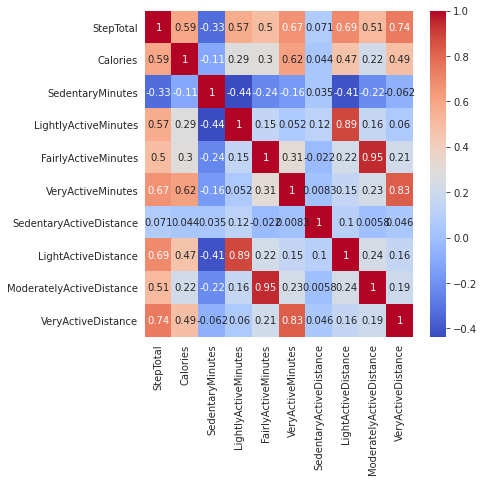

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(merge6.corr(), annot=True, cmap="coolwarm")

According to the corelation matrix, Calories reveal the higher correlated relationship with Step Total, VeryActiveMiniutes. 
This apprantly can be interpreted that the more active and the more steps possitively effect to burn calories which is pretty much common sensical obvious assumption.

Let's particularly see in detail on the plot graphs below.

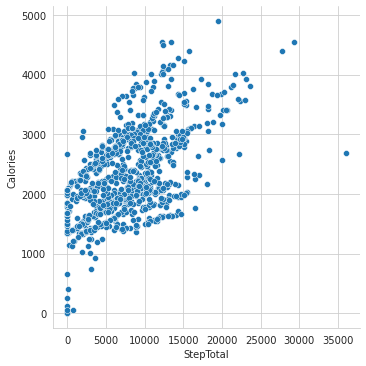

In [ ]:
sns.relplot(x="StepTotal", y="Calories", data=merge5)

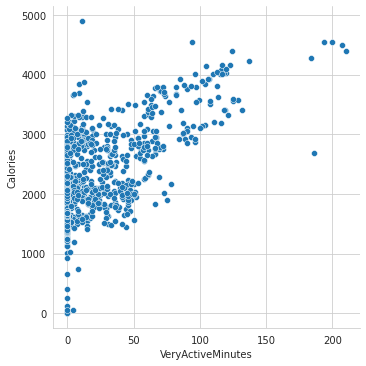

In [ ]:
sns.relplot(x="VeryActiveMinutes", y="Calories", data=merge5)

### Calories & Sleep length
Let's also see the correlation between calories and sleep hours for just in case, although it sounds unlikely.

In [ ]:
sleepDay['ActivityDay'] = pd.to_datetime(sleepDay['SleepDay'])
sleepDay1=sleepDay.drop(columns=['TotalSleepRecords','TotalTimeInBed', 'SleepDay'] )
mean_sleep=sleepDay1.groupby('Id').mean('ActivityDay')


In [ ]:
mean_calories=dailyCalories.groupby('Id').mean('Calories')


In [ ]:
merge_calories_sleep=pd.merge(mean_sleep, mean_calories, how="inner", on="Id")
merge_calories_sleep.head()

,TotalMinutesAsleep,Calories
Id,,
1503960366,360.280000,1816.419355
1644430081,294.000000,2811.300000
1844505072,652.000000,1573.483871
1927972279,417.000000,2172.806452
2026352035,506.178571,1540.645161


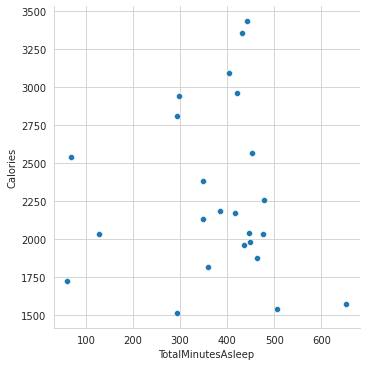

In [ ]:
sns.relplot(x="TotalMinutesAsleep", y="Calories", data=merge_calories_sleep)

As it's shown on the plot graph above, sleep hours do not show corelation with calories burn.

## Conclusions

The number of provided datasets are limited, and it makes challenge to investigate the meaninful insights that possibly beneficial for Bellabeat's marketing campaign.

Regardless, if I would answer for the project answers

*   What is the distribution of daily calories burnt?
  - The majority of the users burn around 2000 claories
*   What is the distribution of daily sleep length?
  - Around 50% of the users sleeps more than 7 hours
*   Are there correlations between weights and activity intensities/calories and activity, steps and intensities/calories and sleep length?
  - The positive correlation only reveals between calories, steps and intensities. That is, the more active steps burn higher calories.


##Recommendation

For recommendations, Bellabeat products needs to develop the recommending system that tracking all the measurable data and that recommend the certain activities to improve. 

The key for the development of business is on personalization of the products. That is, tracking the individual customer's data that gives the adequate information on right time based on their recorded data. 

Thus, the app can notifiy user the comparison betwwen the yesterday and today ' calories and total stpes and degree of activities to encourage them to work out more and burn calories.

Not only for calories, the data such as sleep, stress level etc are also have to be collected and tracked to give better recommending service for the healthier habits. 

Moreover, perhaps offer some contents and infos about having healthier habits if unhealthy habits are spotted according to the accumulated data of customer.

